In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data = pd.read_csv('cleaned_data.csv')
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.033585,2.91625,-1.062200,1.128923,0.943267,-1.482668,-0.258452,0.384230,0.693823,0.142663,-0.218899,-0.078493,0.262722,0
1,0.865959,1.87300,-1.007350,1.128923,-0.389548,-0.737662,-0.884386,0.384230,0.693823,-0.146811,-0.218899,-2.327069,0.262722,0
2,-0.042086,-0.21350,0.245214,-0.438652,-1.722363,-0.240991,-0.258452,0.384230,0.693823,-0.146811,-0.218899,-0.078493,0.262722,0
3,1.092971,-0.21350,0.425761,-1.222440,-0.389548,-0.240991,-0.884386,-2.018206,0.693823,-0.146811,-0.218899,-0.078493,0.262722,0
4,-0.798790,-0.21350,1.407179,1.128923,-0.389548,0.752350,2.245285,-2.018206,-1.441290,-0.146811,-0.218899,-0.078493,-5.330650,0


In [7]:

X = data.drop(columns=['income'])
y = data['income']

# Convert categorical variables into numerical representation (One-Hot Encoding)
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)


Accuracy: 0.7981184283342557
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      6830
           1       0.68      0.33      0.44      2205

    accuracy                           0.80      9035
   macro avg       0.75      0.64      0.66      9035
weighted avg       0.78      0.80      0.77      9035



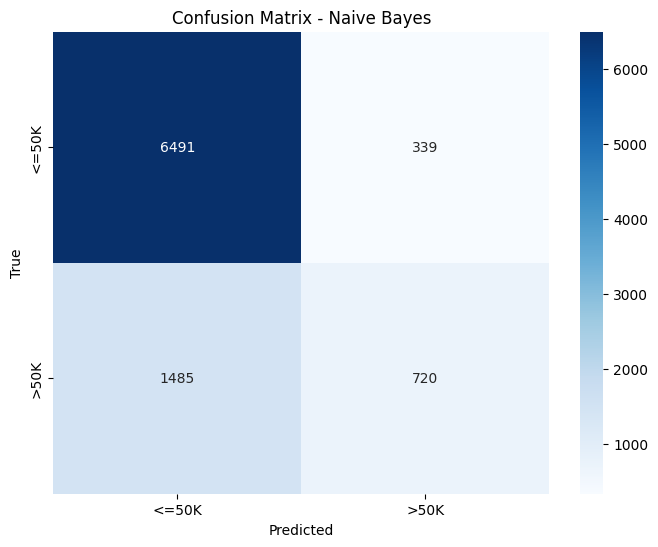

In [8]:
# Generate confusion matrix for the Naive Bayes model
conf_matrix_nb = confusion_matrix(y_test, predictions)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()